<center><span style="font-size: 25px;">Vehicle Loans
prediction model</span> </center>

# **Porblem**

there are many of loan applications provided to be scaned and give a response to those applicants whether they are qualified or not for taking a vehicle loan which takes lots of time to scan these huge amount of applications which lead to customers disatisfaction and as a result losing many of our clients and wasting company's resources like (time, employees effort,...).

# **Project Goal**
reducing company's wasted resources and increasing customer satisfaction by reducing approval waiting time for each loan application.


# **Project strategy**
creating a logistic regressing machine learning model to predict whether the loan applicant will default or not based on some predictors, which will give the organization the advantage of Initially filtering loan applications to give more focus to customer who have **high likelihood** to get loan


# **About dataset..**
a dataset originated form L&T Financial Services which
contains information about vehicle loans from India. each data row express a unique loan that was issued to a customer.

# **Data Dictionary**


| Variable Name                     | Description                                                                 |
|----------------------------------|-----------------------------------------------------------------------------|
| UNIQUEID                          | Unique identifier for each customer                                         |
| DISBURSED_AMOUNT                  | Amount of loan disbursed to the customer                                    |
| ASSET_COST                        | Cost of the vehicle/asset                                                   |
| LTV                               | Loan-to-Value ratio of the asset                                            |
| BRANCH_ID                         | Branch where the loan was disbursed                                         |
| SUPPLIER_ID                       | Vehicle dealer through which the loan was disbursed                         |
| MANUFACTURER_ID                   | Vehicle manufacturer (e.g., Hero, Honda, TVS)                               |
| CURRENT_PINCODE_ID                 | Customer’s current residential pincode                                      |
| DATE_OF_BIRTH                      | Date of birth of the customer                                               |
| EMPLOYMENT_TYPE                    | Employment type of the customer (Salaried / Self-Employed)                 |
| DISBURSAL_DATE                     | Date when the loan was disbursed                                            |
| STATE_ID                           | State where the loan was disbursed                                          |
| EMPLOYEE_CODE_ID                   | Employee who logged the loan disbursement                                   |
| MOBILENO_AVL_FLAG                  | Indicates whether the customer shared a mobile number (1 = Yes, 0 = No)    |
| AADHAR_FLAG                        | Indicates whether Aadhaar was provided (1 = Yes, 0 = No)                   |
| PAN_FLAG                           | Indicates whether PAN was provided (1 = Yes, 0 = No)                       |
| VOTERID_FLAG                       | Indicates whether Voter ID was provided (1 = Yes, 0 = No)                  |
| DRIVING_FLAG                       | Indicates whether Driving License was provided (1 = Yes, 0 = No)           |
| PASSPORT_FLAG                       | Indicates whether Passport was provided (1 = Yes, 0 = No)                  |
| PERFORM_CNS_SCORE                  | Credit bureau score                                                         |
| PERFORM_CNS_SCORE_DESCRIPTION      | Description/category of the credit bureau score                             |
| PRI_NO_OF_ACCTS                    | Total number of primary loans taken by the customer at disbursement         |
| PRI_ACTIVE_ACCTS                   | Number of active primary loans at disbursement                               |
| PRI_OVERDUE_ACCTS                  | Number of overdue primary loan accounts at disbursement                     |
| PRI_CURRENT_BALANCE                | Total outstanding principal amount for active primary loans                 |
| PRI_SANCTIONED_AMOUNT              | Total sanctioned amount for all primary loans                               |
| PRI_DISBURSED_AMOUNT               | Total disbursed amount for all primary loans                                 |
| SEC_NO_OF_ACCTS                    | Total number of secondary loans where the customer is co-applicant/guarantor|
| SEC_ACTIVE_ACCTS                   | Number of active secondary loans                                             |
| SEC_OVERDUE_ACCTS                  | Number of overdue secondary loan accounts                                    |
| SEC_CURRENT_BALANCE                | Total outstanding principal amount for active secondary loans               |
| SEC_SANCTIONED_AMOUNT              | Total sanctioned amount for all secondary loans                              |
| SEC_DISBURSED_AMOUNT               | Total disbursed amount for all secondary loans                                |
| PRIMARY_INSTAL_AMT                 | EMI amount of the primary loan                                              |
| SEC_INSTAL_AMT                     | EMI amount of the secondary loan                                            |
| NEW_ACCTS_IN_LAST_SIX_MONTHS       | Number of new loans taken in the last six months before disbursement        |
| DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS| Number of loans defaulted in the last six months                             |
| AVERAGE_ACCT_AGE                   | Average age of the customer’s loan accounts                                  |
| CREDIT_HISTORY_LENGTH              | Length of the customer’s credit history                                     |
| NO_OF_INQUIRIES                     | Number of loan-related inquiries made by the customer                        |
| LOAN_DEFAULT                        | Target variable: default on first EMI payment (1 = Default, 0 = No Default) |


# **model building workflow**

1.   Prepare Data
      *   import Data
      *   EDA
      *   Feature engineering
      *   spliting Data



2.   Build Model
      *   Build Model
      *   Model evaluation


3.   Conclusion
      * key takeaways and recomendatoins


## 1. Prepare Data

In [136]:
# importing necessary packages

# standard operations
import pandas as pd
import numpy as np

# visualizaion
import matplotlib.pyplot as plt
import seaborn as sns

# Bulding model packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# model evaluation matrices
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
import re
from sklearn.metrics import classification_report


### <font size = 6> - **import Data**</font>



In [ ]:
# importing csv file  into pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/vehicle_loans.csv')

### <font size = 6> - **EDA & Feature Engineering**</font>

In [ ]:
# getting shape of the data
df.shape

(233154, 41)

Data has 233,154 records each record represent a loan applicant with 41 feature that discribe the applicant

In [ ]:
# getting first 5 rows of the data
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [ ]:
# data types of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [ ]:
obj_dt_col = df.select_dtypes(include='object').columns
float_dt_col = df.select_dtypes(include='float').columns
int_dt_col = df.select_dtypes(include='integer').columns
print(f'number of object data type columns: {len(obj_dt_col)}\nnumber of numeric data type columns: {len(float_dt_col)+ len(int_dt_col)}')

number of object data type columns: 6
number of numeric data type columns: 35


the dataset has 6 attributes with object data type (string or date) which may need more cleaning and investigation, and 35 numeric columns (float or integer).

In [ ]:
print(obj_dt_col.to_list())

['DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH']


there are 2 columns have date and they need to be casted to date datatype to perform data related functions and make it easy to the model to use such attributes as input to reach high prediction accuracy

In [ ]:
# casting date columns
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'], format='%d-%m-%Y')
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'], format='%d-%m-%Y')


In [ ]:
print(f"analysis scope is from {df['DISBURSAL_DATE'].min()} to {df['DISBURSAL_DATE'].max()}")

analysis scope is from 2018-08-01 00:00:00 to 2018-10-31 00:00:00


out analysis time span will cover from 3 months from 1/8/2018 to 31/10/2018

<font color = "orange" size = 3>**checking class balance of the target variable**</font>

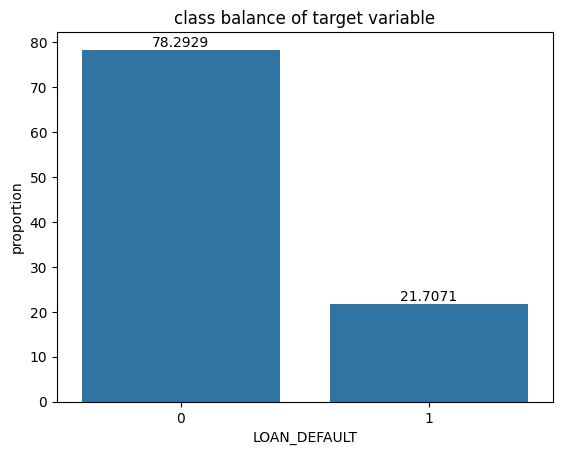

In [ ]:
ax = sns.barplot(df['LOAN_DEFAULT'].value_counts(normalize= True)*100);
plt.title("class balance of target variable");
ax.bar_label(ax.containers[0]);
plt.show()

it seems that the target variable has only 2 values (1 for default and 0 for not-default) and the target variable clasess are imbalanced 80:20 but it seems that the ratio is somewhat acceptable to proceed in developing the model

<font color = "orange" size = 3> **checking for Missing Values**</font>





In [ ]:
df.isnull().sum()

,0
UNIQUEID,0
DISBURSED_AMOUNT,0
ASSET_COST,0
LTV,0
BRANCH_ID,0
SUPPLIER_ID,0
MANUFACTURER_ID,0
CURRENT_PINCODE_ID,0
DATE_OF_BIRTH,0
EMPLOYMENT_TYPE,7661


there are 7661 loan applications have Missing EMPLOYMENT_TYPE

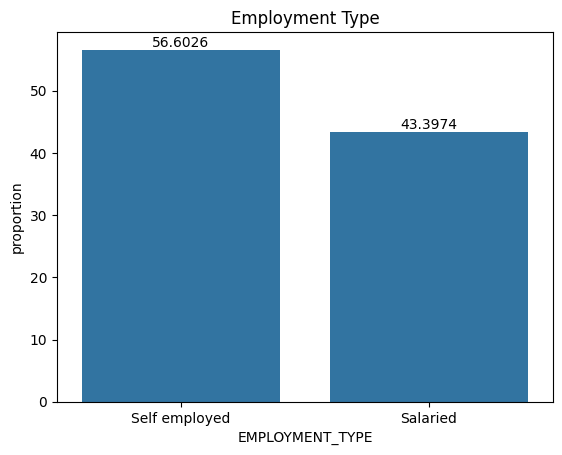

In [ ]:
ax = sns.barplot(df['EMPLOYMENT_TYPE'].value_counts(normalize= True)*100);
plt.title("Employment Type");
ax.bar_label(ax.containers[0]);
plt.show()

there are only Two Types of Employment Status [self employed, Salaried]
self employed people are 56.6%, while Salaried are 43.4% of total loan applicants

<font color = "orange" size = 3> **Missing values imputation**</font>


to impute the missing values in the data set there are many options to adopt. but i will create third category called "Missing" beside the already Two categories existing to provide the flexibility to the model to know how to deal wih applications with missing employment status.

In [ ]:
df = df.fillna(value= {'EMPLOYMENT_TYPE': 'Missing'})

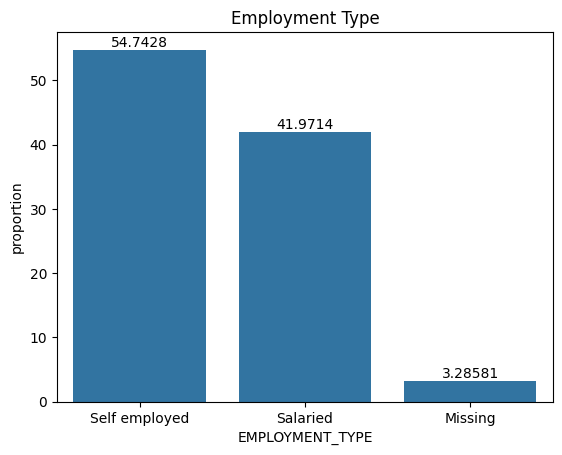

In [ ]:
ax = sns.barplot(df['EMPLOYMENT_TYPE'].value_counts(normalize= True)*100);
plt.title("Employment Type");
ax.bar_label(ax.containers[0]);
plt.show()

In [ ]:
df['EMPLOYMENT_TYPE'].replace({'Self employed': 'Self_employed'}, inplace= True)

/tmp/ipython-input-2450413283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EMPLOYMENT_TYPE'].replace({'Self employed': 'Self_employed'}, inplace= True)


so, after missing values imputation we have 3 categories for Employment Status Attribute [**Self employed**, **Salaried**, **Missing**]

In [ ]:
# checking that there is no missing values in the data after imputation process
assert df.isnull().any().sum() == 0

<font color = 'orange' size = 3>**Exploring Date columns**</font>

In [ ]:
# listing columns have Date field
date_col = [i for i in df.columns if "date" in i.lower()]
date_col

['DATE_OF_BIRTH', 'DISBURSAL_DATE']

it seems using Date of birth column into the model would't be useful as providing the age of the applicant. however, setting an end point to caluculate the age of the applicant would be more challenging especially if i decided to use the current data. so i will use a static data like Dibursal data.

**there are also Two columns  represnt the average duration of loan and the Credit history lenght of the applicant need more structring**

In [ ]:
df[['AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH']].head(10)

,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH
0,0yrs 0mon,0yrs 0mon
1,1yrs 11mon,1yrs 11mon
2,0yrs 0mon,0yrs 0mon
3,0yrs 8mon,1yrs 3mon
4,0yrs 0mon,0yrs 0mon
5,1yrs 9mon,2yrs 0mon
6,0yrs 0mon,0yrs 0mon
7,0yrs 2mon,0yrs 2mon
8,4yrs 8mon,4yrs 8mon
9,1yrs 7mon,1yrs 7mon


In [ ]:
#  extract years and months of each row and convert them to total months
def  calculate_months(str_list):
  """
    Extract years and months of each record in the data frame and convert them to total months.
  """
  years, months = re.findall('\d+',str_list)
  total_months = int(years)*12 + int(months)
  return total_months

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2025903976.py:6: SyntaxWarning: invalid escape sequence '\d'
  years, months = re.findall('\d+',str_list)


In [ ]:
df['AVERAGE_ACCT_AGE(month)'] = df['AVERAGE_ACCT_AGE'].apply(calculate_months)
df['CREDIT_HISTORY_LENGTH(month)'] = df['CREDIT_HISTORY_LENGTH'].apply(calculate_months)


In [ ]:
df[['AVERAGE_ACCT_AGE','AVERAGE_ACCT_AGE(month)','CREDIT_HISTORY_LENGTH', 'CREDIT_HISTORY_LENGTH(month)']].head(10)

,AVERAGE_ACCT_AGE,AVERAGE_ACCT_AGE(month),CREDIT_HISTORY_LENGTH,CREDIT_HISTORY_LENGTH(month)
0,0yrs 0mon,0,0yrs 0mon,0
1,1yrs 11mon,23,1yrs 11mon,23
2,0yrs 0mon,0,0yrs 0mon,0
3,0yrs 8mon,8,1yrs 3mon,15
4,0yrs 0mon,0,0yrs 0mon,0
5,1yrs 9mon,21,2yrs 0mon,24
6,0yrs 0mon,0,0yrs 0mon,0
7,0yrs 2mon,2,0yrs 2mon,2
8,4yrs 8mon,56,4yrs 8mon,56
9,1yrs 7mon,19,1yrs 7mon,19


<font color = 'orange' size = 3>- **Calculating Age of each applicant** </font>


In [ ]:
df[date_col].sample(10)

,DATE_OF_BIRTH,DISBURSAL_DATE
62333,1970-07-04,2018-09-30
37225,1994-09-16,2018-08-20
94460,1977-03-27,2018-08-18
34600,1982-02-27,2018-08-13
82683,1965-04-15,2018-10-23
172206,1972-01-01,2018-09-17
127021,1991-01-02,2018-09-14
206921,1995-05-27,2018-08-20
219767,1972-02-20,2018-08-27
64135,1996-06-01,2018-08-22


<font color = 'orange' size = 3>Disbursal Date </font>

Disbursal date describes the date at which the money granted to the applicant but as shown, there are many unique dates. However, it wouldn't be useful for our model to have many unique values, so i will extract the month of disbursal so that make it easy to the model to get find if there is a relationship between the disbursal month and the status of the loan




In [ ]:
df['DISBURSAL_DATE'].nunique()

84

In [ ]:
df['DISBURSAL_MONTH'] = df['DISBURSAL_DATE'].dt.month

In [ ]:
(df['DISBURSAL_MONTH'].value_counts(normalize= True)*100).round(2)

,proportion
DISBURSAL_MONTH,
10,42.19
8,29.17
9,28.65


In [ ]:
df["applicant_age"] = df["DISBURSAL_DATE"] - df["DATE_OF_BIRTH"]
df["applicant_age"]  = df["applicant_age"]  // pd.to_timedelta(365, 'D')



In [ ]:
df["applicant_age"]

,applicant_age
0,34
1,33
2,32
3,24
4,40
...,...
233149,30
233150,29
233151,42
233152,24


/tmp/ipython-input-1382061053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["applicant_age"], hist = False)


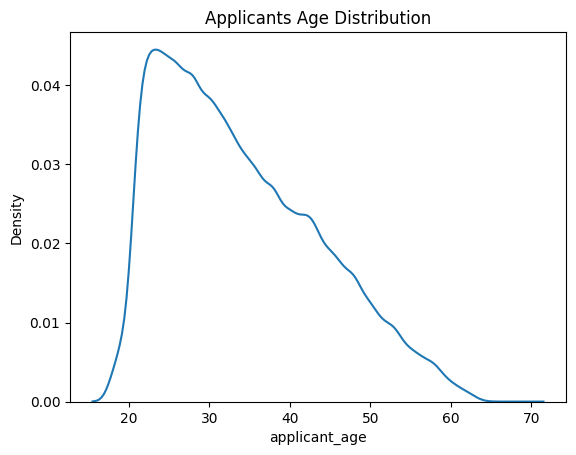

In [ ]:
sns.distplot(df["applicant_age"], hist = False)
plt.title("Applicants Age Distribution")
plt.show()

The plot above shows that the highest age category who apply for vehicle loans are people at the early stage of their career life

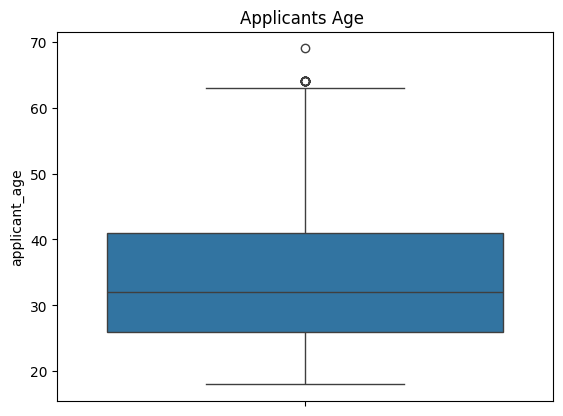

In [ ]:
sns.boxplot(df["applicant_age"]);
plt.title("Applicants Age ");
plt.show()

As presented in the Box Plot above, there are some outlier points in the data, but they are in the normal range of ages. so they will not cause a problem in the future while building the model

In [ ]:
df["applicant_age"].describe()

,applicant_age
count,233154.000000
mean,33.954142
std,9.821186
min,18.000000
25%,26.000000
50%,32.000000
75%,41.000000
max,69.000000


The mean of applicants' age is near 34 years old, while the median is 32, indicating there is a little right skewness in the data

<font color = 'orange' size = 3>Age Grouping </font>

to make the age column easier whiler interpretation i will group the ages into 6 categories based on the career level

| Age Range  | Category Name |
| ------------- |:-------------:|
| 18-24	      | Young Adult     |
| 25-34	      | Early Career    |
| 35-44	      | Mid Career      |
| 45-54       | Late Career     |                
| 55-64       | Pre-Retirement  |
| >64         | Retired         |


This kind of grouping works well because different age groups might have different financial behaviors (spending, saving, risk tolerance, etc.).



In [ ]:
def age_category(age):
    if 18 <= age <= 24:
        return 'Young Adult (18~24)'
    elif 25 <= age <= 34:
        return 'Early Career (25~34)'
    elif 35 <= age <= 44:
        return 'Mid Career (35~44)'
    elif 45 <= age <= 54:
        return 'Late Career (45~54)'
    elif 55 <= age <= 64:
        return 'Pre-Retirement (55~64)'
    elif age > 64:
        return 'Retired ( >64)'
    else:
        return 'Unknown'  # Just in case


In [ ]:
df['Age_Category'] = df['applicant_age'].apply(age_category)

In [ ]:
age_order = ['Young Adult (18~24)', 'Early Career (25~34)', 'Mid Career (35~44)', 'Late Career (45~54)', 'Pre-Retirement (55~64)', 'Retired ( >64)']
df['Age_Category'] = pd.Categorical(df['Age_Category'], categories=age_order, ordered=True)

In [ ]:
df['Age_Category'].value_counts().sort_index()

,count
Age_Category,
Young Adult (18~24),44887
Early Career (25~34),89896
Mid Career (35~44),59291
Late Career (45~54),31454
Pre-Retirement (55~64),7625
Retired ( >64),1


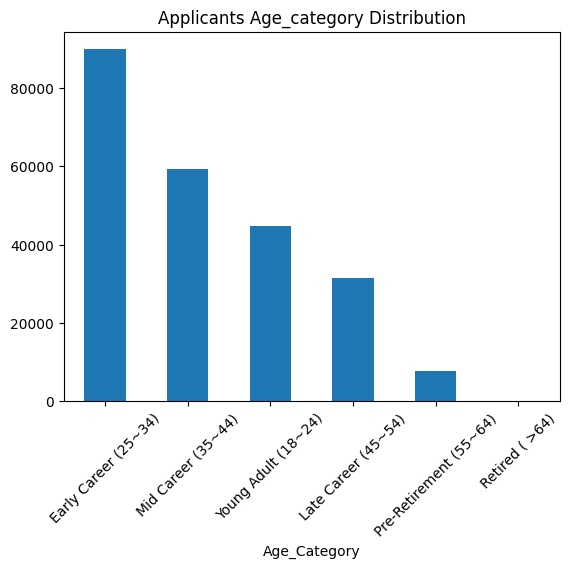

In [ ]:
df['Age_Category'].value_counts().plot(kind='bar')
plt.title("Applicants Age_category Distribution")
plt.xticks(rotation=45);
plt.show()

the most age categories applied for vichle loan are


1.   people at Early Career stage
2.   people at Mid Career stage
3.   Young Adult people



<font color = 'orange' size = 3> Loan_Default [dependent variable]<font>

i will explore the relationship between the loan default status of each applicant with their age and employment Type

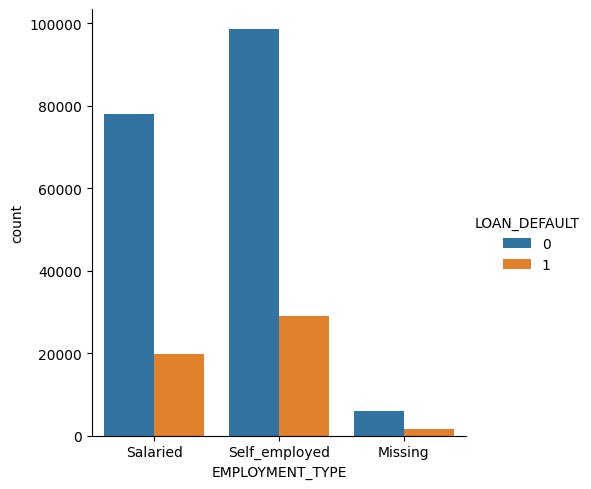

In [ ]:
sns.catplot(data= df, kind= 'count', x= 'EMPLOYMENT_TYPE', hue= 'LOAN_DEFAULT');
plt.show()

The graph illustrates a clear increase in default rates among self employed groups, highlighting employment Type as a potential risk factor.

In [ ]:
df.groupby(["Age_Category",'EMPLOYMENT_TYPE'])['LOAN_DEFAULT'].value_counts(normalize= True).sort_index().round(2)*100

/tmp/ipython-input-3977503039.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Age_Category",'EMPLOYMENT_TYPE'])['LOAN_DEFAULT'].value_counts(normalize= True).sort_index().round(2)*100


Age_Category            EMPLOYMENT_TYPE  LOAN_DEFAULT
Young Adult (18~24)     Missing          0                77.0
                                         1                23.0
                        Salaried         0                77.0
                                         1                23.0
                        Self_employed    0                74.0
                                         1                26.0
Early Career (25~34)    Missing          0                84.0
                                         1                16.0
                        Salaried         0                80.0
                                         1                20.0
                        Self_employed    0                76.0
                                         1                24.0
Mid Career (35~44)      Missing          0                84.0
                                         1                16.0
                        Salaried         0                81.0
                                         1                19.0
                        Self_employed    0                79.0
                                         1                21.0
Late Career (45~54)     Missing          0                85.0
                                         1                15.0
                        Salaried         0                81.0
                                         1                19.0
                        Self_employed    0                79.0
                                         1                21.0
Pre-Retirement (55~64)  Missing          0                88.0
                                         1                12.0
                        Salaried         0                84.0
                                         1                16.0
                        Self_employed    0                80.0
                                         1                20.0
Retired ( >64)          Missing          0               100.0
                                         1                 0.0
                        Salaried         0                 0.0
                                         1                 0.0
                        Self_employed    0                 0.0
                                         1                 0.0
Name: proportion, dtype: float64

:The highest proportion of loan default people lies at the <font color = 'red'>Young Adult</font> stage, especially self-employed Young Adults that perhaps return to  that they are still young and don't have a stable source of income to afford paying loans installlments

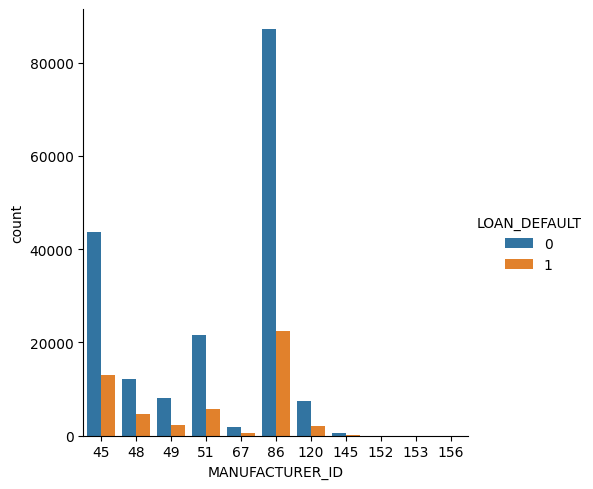

In [ ]:
sns.catplot(data= df, kind= 'count', x= 'MANUFACTURER_ID', hue= 'LOAN_DEFAULT');
plt.show()

As visualized in the plot high proportion of vichel loans goes for the manufacturer with ID 86. By the way, the highest proportion of loan default is for manufacturer 86, which also indicates that people who buy their vehicles from manufacturer 86 have more risk of defaulting than others

<font color = 'orange' size = 3>-Exploring Binary variables</font>

there are 6 boolean variables represnting if the custome shared specific documents or not

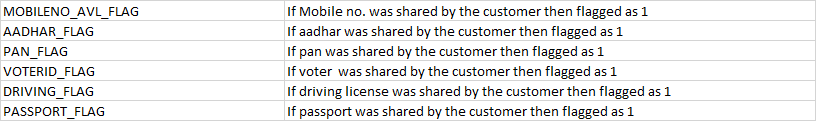



In [ ]:
Flagged_features = [i for i in df.columns if 'FLAG' in i]

for feature in Flagged_features:
   print(df[df[feature] == 0]['LOAN_DEFAULT'].value_counts(normalize= True))

Series([], Name: proportion, dtype: float64)
LOAN_DEFAULT
0    0.743594
1    0.256406
Name: proportion, dtype: float64
LOAN_DEFAULT
0    0.78317
1    0.21683
Name: proportion, dtype: float64
LOAN_DEFAULT
0    0.790354
1    0.209646
Name: proportion, dtype: float64
LOAN_DEFAULT
0    0.782559
1    0.217441
Name: proportion, dtype: float64
LOAN_DEFAULT
0    0.782784
1    0.217216
Name: proportion, dtype: float64


there is around 21% of people who didn't provide document facing defaulting

In [ ]:
# convert Flagged_features into bool datatype
for feature in Flagged_features:
   df[feature] = df[feature].astype(bool)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UNIQUEID                             233154 non-null  int64         
 1   DISBURSED_AMOUNT                     233154 non-null  int64         
 2   ASSET_COST                           233154 non-null  int64         
 3   LTV                                  233154 non-null  float64       
 4   BRANCH_ID                            233154 non-null  int64         
 5   SUPPLIER_ID                          233154 non-null  int64         
 6   MANUFACTURER_ID                      233154 non-null  int64         
 7   CURRENT_PINCODE_ID                   233154 non-null  int64         
 8   DATE_OF_BIRTH                        233154 non-null  datetime64[ns]
 9   EMPLOYMENT_TYPE                      233154 non-null  object        
 

In [ ]:
df.sample(10)

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AVERAGE_ACCT_AGE(month),CREDIT_HISTORY_LENGTH(month),DISBURSAL_MONTH,applicant_age,Age_Category
175543,589441,54813,70048,79.95,18,14234,86,2702,1980-08-03,Salaried,...,0,0yrs 0mon,0yrs 0mon,0,0,0,0,10,38,Mid Career (35~44)
211572,585061,63847,73757,88.13,15,18387,51,345,1988-09-17,Salaried,...,0,0yrs 0mon,0yrs 0mon,0,0,0,0,10,30,Early Career (25~34)
127019,648465,39074,84361,48.60,7,18174,45,5828,1986-12-12,Self_employed,...,0,0yrs 0mon,0yrs 0mon,0,0,0,0,10,31,Early Career (25~34)
188713,653228,48303,71743,69.97,121,21043,86,3653,1997-04-06,Salaried,...,0,0yrs 0mon,0yrs 0mon,0,0,0,0,10,21,Young Adult (18~24)
152027,573439,51103,68753,76.21,67,22703,86,1515,1974-01-01,Salaried,...,0,0yrs 6mon,0yrs 6mon,0,0,6,6,10,44,Mid Career (35~44)
35783,555496,59923,75793,84.44,152,17795,86,4991,1962-05-03,Self_employed,...,0,5yrs 5mon,10yrs 3mon,0,0,65,123,10,56,Pre-Retirement (55~64)
41842,621046,76979,117155,66.49,8,23520,51,5526,1977-08-25,Salaried,...,0,0yrs 0mon,0yrs 0mon,0,0,0,0,10,41,Mid Career (35~44)
220758,554428,41994,71260,60.34,18,14115,86,2706,1968-03-19,Self_employed,...,1,3yrs 7mon,9yrs 11mon,1,0,43,119,9,50,Late Career (45~54)
2347,459447,44394,58104,77.45,3,14711,45,41,1993-07-12,Salaried,...,0,0yrs 6mon,0yrs 6mon,0,0,6,6,8,25,Early Career (25~34)
163139,522673,24074,67764,36.15,165,21064,86,6482,1996-03-01,Salaried,...,0,0yrs 10mon,0yrs 10mon,0,0,10,10,9,22,Young Adult (18~24)


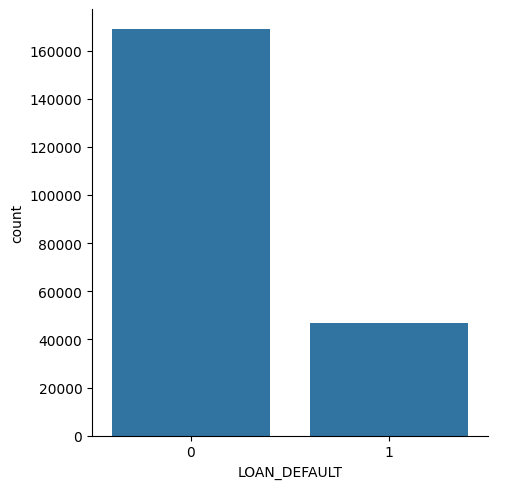

In [ ]:
sns.catplot(data= df, kind= 'count', x= df[df['PAN_FLAG'] == 0]['LOAN_DEFAULT'])
plt.show()

In [ ]:
df['DISBURSED_AMOUNT'].describe()

,DISBURSED_AMOUNT
count,233154.000000
mean,54356.993528
std,12971.314171
min,13320.000000
25%,47145.000000
50%,53803.000000
75%,60413.000000
max,990572.000000


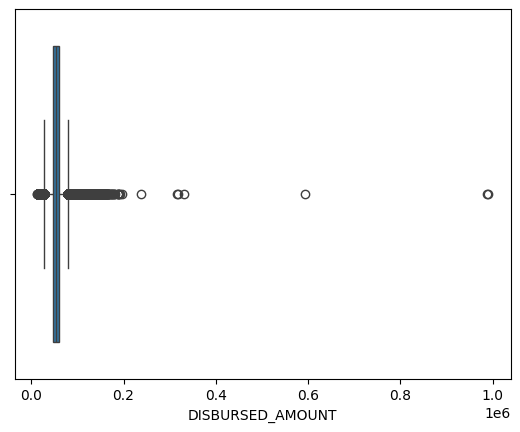

In [ ]:
sns.boxplot(data= df, x= df['DISBURSED_AMOUNT'])
plt.show()

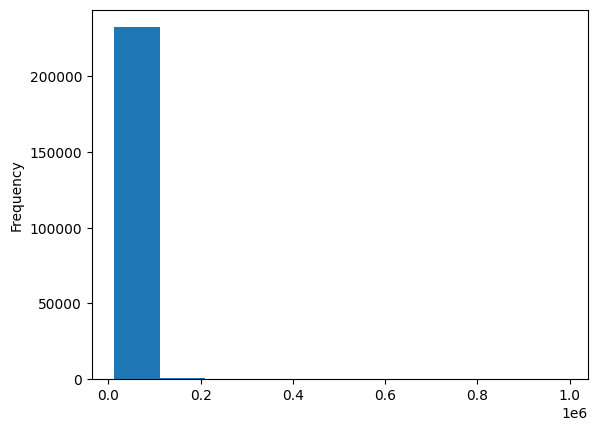

In [ ]:
df['DISBURSED_AMOUNT'].plot(kind= 'hist')
plt.show()

there is a right skewed in  DISBURSED_AMOUNT Col

In [ ]:
df.iloc[df['DISBURSED_AMOUNT'].idxmax()]['DISBURSED_AMOUNT']/ df.iloc[df['DISBURSED_AMOUNT'].idxmax()]['ASSET_COST'] * 100

np.float64(60.80889286135229)

it seems reasonable that the disbursed amount equals 60% of the Asset Value. so, we don't need to remove such outlier. but to get rid of such outlier problem i would convert this continues variable to categorical variable using binning

In [ ]:
disbursed_amount_bins = [13000, 30000, 45000, 60000, 75000, 150000, 1000000]
disbursed_amount_labels = ['13k-30k', '30k-45k', '45k-60k', '60k-75k', '75k-150k', '150k+']
df['DISBURSED_AMOUNT_BINS'] = pd.cut(df['DISBURSED_AMOUNT'], bins= disbursed_amount_bins, labels= disbursed_amount_labels)
df['DISBURSED_AMOUNT_BINS'].value_counts(normalize= True)

,proportion
DISBURSED_AMOUNT_BINS,
45k-60k,0.544293
60k-75k,0.213696
30k-45k,0.174245
75k-150k,0.046626
13k-30k,0.020866
150k+,0.000274


it will be more compatible if the number of features reduced and the correlated feature transformed into one feature, so i will generate a new column named "DISBURSAL_TO_ASSET_PRCT" to eliminate the two related columns "ASSET_COST" and "DISBURSED_AMOUNT"

In [ ]:
df['DISBURSAL_TO_ASSET_PRCT'] = df['DISBURSED_AMOUNT']/ df['ASSET_COST']

primary and secondary Acc Engineering

The loan data contains 14 columns providing informaton about any existing loans a customer may have. this data is split according to primary and secondary accounts, a primary account is a loan where the customer is the sole recipient of the disbursal, a secondary account is one where the customer is one where the customer is a coapplicant or guarantor for the loan

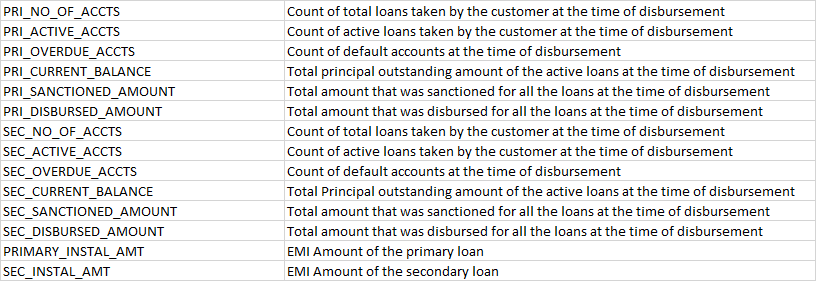

In [ ]:
#Extracting pri and sec features from df
primary_Acc = [ i for i in df if "PRI" in i]
secondary_Acc = [ i for i in df if "SEC" in i]
print(secondary_Acc)
print(primary_Acc)

['SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'SEC_INSTAL_AMT']
['PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT']


In [ ]:
#combining the sec and pri columns in one column
for i in range(len(primary_Acc)):
    df["TOTAL_" + primary_Acc[i][4:]] = df[primary_Acc[i]] + df[secondary_Acc[i]]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UNIQUEID                             233154 non-null  int64         
 1   DISBURSED_AMOUNT                     233154 non-null  int64         
 2   ASSET_COST                           233154 non-null  int64         
 3   LTV                                  233154 non-null  float64       
 4   BRANCH_ID                            233154 non-null  int64         
 5   SUPPLIER_ID                          233154 non-null  int64         
 6   MANUFACTURER_ID                      233154 non-null  int64         
 7   CURRENT_PINCODE_ID                   233154 non-null  int64         
 8   DATE_OF_BIRTH                        233154 non-null  datetime64[ns]
 9   EMPLOYMENT_TYPE                      233154 non-null  object        
 

In [ ]:
# to change the name of col TOTAL_ARY_INSTAL_AMT to TOTAL_INSTAL_AMT
df['TOTAL_ARY_INSTAL_AMT'].name = 'TOTAL_INSTAL_AMT'

In [ ]:
df['OVERDUE_ACC_PCT'] = df['TOTAL_OVERDUE_ACCTS']/df['TOTAL_NO_OF_ACCTS']

In [ ]:
#searching for observations with null value that result of dividing by zero
df['OVERDUE_ACC_PCT'].isnull().sum()


np.int64(115792)

In [ ]:
# filling null with 0
df['OVERDUE_ACC_PCT'] = df['OVERDUE_ACC_PCT'].fillna(0)

to make the continues variables have the same importance, i would scale them between 0 and 1



In [ ]:
# prompt: select all numirec columns

import numpy as np
numeric_columns = df.select_dtypes(include=np.number).columns
#exclude boolean or ID columns
continues_numeric_columns = [i for i in numeric_columns if 'FLAG' not in i and 'ID' not in i]



In [ ]:
# scaling continues variables
scaler = MinMaxScaler()
df[continues_numeric_columns] = scaler.fit_transform(df[continues_numeric_columns])



at this stage i will clean the dataset from any useless feature to prepare the data for the next step

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 56 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UNIQUEID                             233154 non-null  int64         
 1   DISBURSED_AMOUNT                     233154 non-null  float64       
 2   ASSET_COST                           233154 non-null  float64       
 3   LTV                                  233154 non-null  float64       
 4   BRANCH_ID                            233154 non-null  int64         
 5   SUPPLIER_ID                          233154 non-null  int64         
 6   MANUFACTURER_ID                      233154 non-null  int64         
 7   CURRENT_PINCODE_ID                   233154 non-null  int64         
 8   DATE_OF_BIRTH                        233154 non-null  datetime64[ns]
 9   EMPLOYMENT_TYPE                      233154 non-null  object        
 

<font color = 'orange' size = 3>- Features selection</font>

i will Drop features that contains categorical high number of unique values like __ID columns to make the model simpler

In [ ]:
#selection A data subset of the most 9 factors considered have direct effect on the loan default as predictors to make the model simpler
sub_cols = ['EMPLOYMENT_TYPE','STATE_ID', 'Age_Category', 'PERFORM_CNS_SCORE', 'NO_OF_INQUIRIES', 'MANUFACTURER_ID', 'LTV','TOTAL_OVERDUE_ACCTS','AVERAGE_ACCT_AGE','LOAN_DEFAULT']
loan_df_sub = df[sub_cols]

In [ ]:
loan_df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   EMPLOYMENT_TYPE      233154 non-null  category
 1   STATE_ID             233154 non-null  category
 2   Age_Category         233154 non-null  category
 3   PERFORM_CNS_SCORE    233154 non-null  float64 
 4   NO_OF_INQUIRIES      233154 non-null  float64 
 5   MANUFACTURER_ID      233154 non-null  category
 6   LTV                  233154 non-null  float64 
 7   TOTAL_OVERDUE_ACCTS  233154 non-null  float64 
 8   AVERAGE_ACCT_AGE     233154 non-null  object  
 9   LOAN_DEFAULT         233154 non-null  float64 
dtypes: category(4), float64(5), object(1)
memory usage: 11.6+ MB


In [ ]:
loan_df_sub.shape

(233154, 10)

In [ ]:
# converting modifing datatype of categorical columns to category datatype
categorical_col = ['MANUFACTURER_ID', 'EMPLOYMENT_TYPE', 'STATE_ID', 'PERFORM_CNS_SCORE_DESCRIPTION']
df[categorical_col]= df[categorical_col].astype('category')


<font color = 'orange' size = 3>- One Hot Encoding</font>

In [ ]:
loan_data_dumm = pd.get_dummies(loan_df_sub, drop_first = True, prefix_sep= '_')

### -Splitting Data

In [ ]:
x = loan_data_dumm.drop('LOAN_DEFAULT', axis = 1)
y = loan_data_dumm['LOAN_DEFAULT']

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Columns: 233 entries, PERFORM_CNS_SCORE to AVERAGE_ACCT_AGE_9yrs 9mon
dtypes: bool(229), float64(4)
memory usage: 58.0 MB


In [ ]:
# Splitting Data into train and test categories with propotion of 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]


In [ ]:
print(y_train.value_counts(normalize= True))
print(y_test.value_counts(normalize= True))

LOAN_DEFAULT
0.0    0.783099
1.0    0.216901
Name: proportion, dtype: float64
LOAN_DEFAULT
0.0    0.782248
1.0    0.217752
Name: proportion, dtype: float64


## Build Model

### Building model

In [ ]:
logistic_model = LogisticRegression(max_iter= 1000)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# generating predictions
pred = logistic_model.predict(x_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
#model accuracy
logistic_model.score(x_test, y_test)

0.7821406360575582

the model managed to predict about 78% of the data

### Model Evaluation

to evaluate the quality of the model, i will use different evaluatio measures like Confusion Matrix,

<font color = 'Green' size = 3>- Confusion Matrix</font>

In [ ]:
conf_mat = confusion_matrix(y_test, pred)
conf_mat

array([[36441,    36],
       [10123,    31]])

True Psoitve : represent the number of loans we correctly predicted as defaults

False Positive : number of loans predicted as defaults incorrectly

True Negative : number of loans we correctly predicted as non-defaults

False Negative : number of loans model predicted as non-defaults but it default  

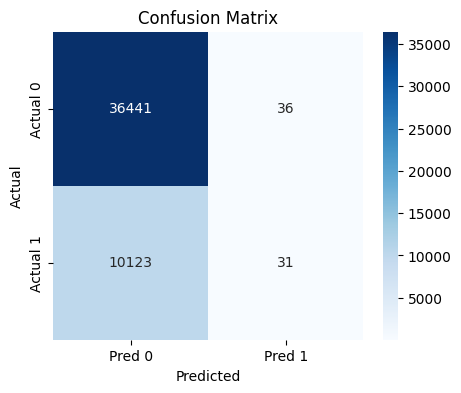

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

it seems after creating conf_mat that the accuracty of 78% seems abit misleading which indicates that the binary logistic calssification model not accurate enough to depend on. so i will use more measures to get full image about the model prediction effectiveness

Accuracy = describe what proportion of predictions was correct

precision = descibe the propotion of true predictions to the total positive predictions

recall = descibes the percentage of positve cases the model truely predicted to the actual positive cases

F1 score = provides a balance between precision and recall


In [ ]:
precison = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
print(f"Precision: {precison}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.4626865671641791
Recall: 0.0030529840456962774
F1 Score: 0.006065942667058018


as per the previous indicators, it seems that the model is not reliabel to be used as predictor for loan default as


*   Out of all customers predicted as defaulters 46% actually defaulted 54% were false alarms
*   among all actual positive cases the model managed to predict 0.3% of them truly



from previous analysis for applicants age

*   the applicants age distribution is skewed to the right
*  the highest age category applying for vehicle loans lies between 20~35.
*   the highest applicant age is 69 while the lowest is 18 years old.
*   about 50% of the applicants age lies below 32 years old. However 75% of applicants their age lies below 41 years old.
*   the applicants age is centerd around 34 years old.




### Building Random Forest model

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation (Random Forest)

In [ ]:
# Generating predictions
rf_pred = random_forest_model.predict(x_test)
rf_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Model accuracy
rf_accuracy = random_forest_model.score(x_test, y_test)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

Random Forest Model Accuracy: 0.7268

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84     36477
         1.0       0.27      0.15      0.19     10154

    accuracy                           0.73     46631
   macro avg       0.53      0.52      0.51     46631
weighted avg       0.68      0.73      0.70     46631





---




<br>


**Overall Conclusion on Models** the two models struggle significantly with accurately predicting loan defaults (the minority class), primarily due to the severe class imbalance in the dataset. none of the models are yet reliable for the core problem of identifying loan defaulters. it is recommended to take further steps, such as advanced handling of class imbalance (e.g., oversampling, undersampling, SMOTE) or increasing the data ,are likely necessary.



---



<font color = 'orange' size = 3>- **Handling class imbalnce** </font>



The dataset was imbalanced, which caused low recall for the minority class.
I going to use  SMOTE to generate synthetic minority samples instead of duplicating existing ones, which helpe to  improve recall while reducing overfitting compared to random oversampling.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Original training data shape:", x_train.shape, y_train.shape)
print("Resampled training data shape:", x_train_resampled.shape, y_train_resampled.shape)
print("\nNew class distribution in resampled training data:")
print(y_train_resampled.value_counts(normalize=True))

Original training data shape: (186523, 233) (186523,)
Resampled training data shape: (292132, 233) (292132,)

New class distribution in resampled training data:
LOAN_DEFAULT
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


### Retraining Logistic Regression Model with SMOTE-Resampled Data

In [ ]:
logistic_model_resampled = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_resampled.fit(x_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

### Evaluating Retrained Logistic Regression Model

In [ ]:
# Generating predictions with the retrained model
pred_resampled_lr = logistic_model_resampled.predict(x_test)

# Model accuracy
lr_accuracy_resampled = logistic_model_resampled.score(x_test, y_test)
print(f"Logistic Regression Model (Resampled) Accuracy: {lr_accuracy_resampled:.4f}")

# Classification report
print("\nClassification Report (Logistic Regression - Resampled):")
print(classification_report(y_test, pred_resampled_lr))

Logistic Regression Model (Resampled) Accuracy: 0.5770

Classification Report (Logistic Regression - Resampled):
              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68     36477
         1.0       0.28      0.59      0.38     10154

    accuracy                           0.58     46631
   macro avg       0.56      0.58      0.53     46631
weighted avg       0.71      0.58      0.61     46631



### Retraining Random Forest Model with SMOTE-Resampled Data

In [ ]:
random_forest_model_resampled = RandomForestClassifier(random_state=42)
random_forest_model_resampled.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### Evaluating Retrained Random Forest Model

In [ ]:
# Generating predictions with the retrained model
pred_resampled_rf = random_forest_model_resampled.predict(x_test)

# Model accuracy
rf_accuracy_resampled = random_forest_model_resampled.score(x_test, y_test)
print(f"Random Forest Model (Resampled) Accuracy: {rf_accuracy_resampled:.4f}")

# Classification report
print("\nClassification Report (Random Forest - Resampled):")
print(classification_report(y_test, pred_resampled_rf))

Random Forest Model (Resampled) Accuracy: 0.6621

Classification Report (Random Forest - Resampled):
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78     36477
         1.0       0.26      0.29      0.27     10154

    accuracy                           0.66     46631
   macro avg       0.53      0.53      0.53     46631
weighted avg       0.68      0.66      0.67     46631



After applying SMOTE, the training data became balanced with a 50–50 class distribution.
This helped the model learn patterns of the minority class better, leading to improved recall when evaluated on the original imbalanced test set

In [ ]:



# Extract metrics for class before SMOTE
report_lr_original = classification_report(y_test, pred, output_dict=True)
report_rf_original = classification_report(y_test, rf_pred, output_dict=True)


# Extract metrics for class  after SMOTE
report_lr_resampled = classification_report(y_test, pred_resampled_lr, output_dict=True)
report_rf_resampled = classification_report(y_test, pred_resampled_rf, output_dict=True)


summary_data = {
    'Model': [
        'Logistic Regression (Original)', 'Random Forest (Original)',
        'Logistic Regression (SMOTE)', 'Random Forest (SMOTE)'
    ],
    'Accuracy': [
        logistic_model.score(x_test, y_test),
        rf_accuracy,
        lr_accuracy_resampled,
        rf_accuracy_resampled,

    ],
    'Precision': [
        report_lr_original['1.0']['precision'],
        report_rf_original['1.0']['precision'],
        report_lr_resampled['1.0']['precision'],
        report_rf_resampled['1.0']['precision'],

    ],
    'Recall': [
        report_lr_original['1.0']['recall'],
        report_rf_original['1.0']['recall'],
        report_lr_resampled['1.0']['recall'],
        report_rf_resampled['1.0']['recall'],

    ],
    'F1-Score': [
        report_lr_original['1.0']['f1-score'],
        report_rf_original['1.0']['f1-score'],
        report_lr_resampled['1.0']['f1-score'],
        report_rf_resampled['1.0']['f1-score'],

    ]
}

summary_df = pd.DataFrame(summary_data).round(4)
display(summary_df)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Original),0.7821,0.4627,0.0031,0.0061
1,Random Forest (Original),0.7268,0.2681,0.1472,0.1901
2,Logistic Regression (SMOTE),0.5770,0.2788,0.5939,0.3794
3,Random Forest (SMOTE),0.6621,0.2575,0.2930,0.2741
